# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

## CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

## Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

### Problem definition

Predict the price of used cars based on their characteristics.

The goal is to utilize regression models to identify significant predictors of car prices and provide actionable ingights to a used cat dealership on which vehicle features consumers value the most.



In transforming the business understanding of identifying key drivers for used car prices into a data problem definition, we can approach it as follows:

**Data Problem Definition:**

The task is to construct a predictive analytics model that quantifies the relationship between various vehicle attributes and their listing prices. This involves identifying and quantifying correlations and causations between the dependent variable (used car prices) and independent variables (attributes such as year of manufacture, make, model, mileage, condition, and other relevant features). The objective is to employ statistical analysis and machine learning techniques to develop a robust regression model that can predict car prices based on these attributes. The model’s effectiveness will be evaluated based on its accuracy, as measured by metrics such as Root Mean Squared Error (RMSE) and R-squared (R²). The ultimate goal is to leverage this model to provide actionable insights that can guide inventory decisions at a used car dealership by highlighting features that significantly impact vehicle valuation in the market.

#### Notes



## Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

### Loading nessary modules for data understanding

In [214]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_rows', 500)


In [3]:
# Load data
cars = pd.read_csv(filepath_or_buffer='data/vehicles.csv')

In [4]:
cars.head(5)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [6]:
cars.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [7]:
cars.duplicated().sum()

0

In [8]:
cars.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [9]:
missing_percentage = cars.isnull().sum() / cars.shape[0] * 100
missing_percentage[missing_percentage > 0]

year             0.282281
manufacturer     4.133714
model            1.236179
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
VIN             37.725356
drive           30.586347
size            71.767476
type            21.752717
paint_color     30.501078
dtype: float64

In [10]:
unique_objects = {}
for column in cars.columns:
    if cars[column].dtype == 'object':
        unique_objects[column] = len(cars[column].unique())
unique_objects

{'region': 404,
 'manufacturer': 43,
 'model': 29650,
 'condition': 7,
 'cylinders': 9,
 'fuel': 6,
 'title_status': 7,
 'transmission': 4,
 'VIN': 118247,
 'drive': 4,
 'size': 5,
 'type': 14,
 'paint_color': 13,
 'state': 51}

* Better to drop `ID`, `VIN` columns which are not very helpful.
* Drop `mode` wich has high cardinality.

In [11]:
unique_objects = {}
for column in cars.columns:
    if cars[column].dtype == 'object' and column not in ['region', 'manufacturer', 'model', 'VIN', 'state']:
        unique_objects[column] = cars[column].unique()
unique_objects


{'condition': array([nan, 'good', 'excellent', 'fair', 'like new', 'new', 'salvage'],
       dtype=object),
 'cylinders': array([nan, '8 cylinders', '6 cylinders', '4 cylinders', '5 cylinders',
        'other', '3 cylinders', '10 cylinders', '12 cylinders'],
       dtype=object),
 'fuel': array([nan, 'gas', 'other', 'diesel', 'hybrid', 'electric'], dtype=object),
 'title_status': array([nan, 'clean', 'rebuilt', 'lien', 'salvage', 'missing',
        'parts only'], dtype=object),
 'transmission': array([nan, 'other', 'automatic', 'manual'], dtype=object),
 'drive': array([nan, 'rwd', '4wd', 'fwd'], dtype=object),
 'size': array([nan, 'full-size', 'mid-size', 'compact', 'sub-compact'],
       dtype=object),
 'type': array([nan, 'pickup', 'truck', 'other', 'coupe', 'SUV', 'hatchback',
        'mini-van', 'sedan', 'offroad', 'bus', 'van', 'convertible',
        'wagon'], dtype=object),
 'paint_color': array([nan, 'white', 'blue', 'red', 'black', 'silver', 'grey', 'brown',
        'yellow', 

In [12]:
cars.loc[cars['manufacturer'].isnull(), 'model'].value_counts()


model
Scion iM Hatchback 4D             640
smart fortwo Passion Hatchback    168
Genesis G80 3.8 Sedan 4D          163
Freightliner Cascadia             153
International 4300                148
                                 ... 
bentley continental gtc             1
BENTLEY FLYING SPUR                 1
NISSA SENTRA                        1
1992 International 4900             1
Paige Glenbrook Touring             1
Name: count, Length: 6044, dtype: int64

In [13]:
# Remove model row.
# Remove rows with models which contains Freightliner, International 4300, WORKHORSE  as they are trucks not cars using varaiable remove_models_containing.
# Create a map for models that contain model to manufacturer map using var manufacturer_map. Here for any null manufacturer, if model contains a key of manufacturer_map, then mainmanufacturer is manufacturer_map[key]
remove_models_containing = ['Freightliner', 'International', 'WORKHORSE', 'Hino', 'peterbilt', 'BLUE BIRD', 'sterling',
                            'Kenworth']
manufacturer_map = {
  "scion": "scion",
  "smart fortwo": "smart fortwo",
  "genesis": "genesis",
  "hummer": "gmc",
  "ierra 1500": "gmc", # sierra 1500
  "oldsmobile": "gmc",
  "maserati": "maserati",
  "lamborghini": "lamborghini",
  "mclaren": "mclaren",
  "isuzu": "isuzu",
  "saab": "saab",
  "f-150": "ford",
  "f-250": "ford",
  "altima": "nissan",
  "tacoma": "toyota",
  "suzuki":   "suzuki",
  "subaru": "subaru",
  "Suburu": "subaru",
  "rolls royce": "rolls-royce",
  "Bentley": "bentley",
  "lotus": "lotus",
  "volvo": "volvo",
  "gm": "gmc",
  "hyndai": "hyundai",
  "hundai": "hyundai",
  "SANTA FE": "hyundai",
  "hiunday": "hyundai",
  "chryler": "chrysler",
  "corvette": "chevrolet",
  "chevrolet": "chevrolet",
  "chevorlet": "chevrolet",
  "cheverolet": "chevrolet",
  "Chevy": "chevrolet",
  "toyota": "toyota",
  "TOYOYTA": "toyota",
  "infinite": "infiniti",
  "infiniti": "infiniti",
  "g35": "infiniti",
  "g37": "infiniti",
  "ford": "ford",
  "acura": "acura",
  "acrura": "acura",
  "accura": "acura",
  "jeep": "jeep",
  "Wrangler": "jeep",
  "honda": "honda",
  "mazda": "mazda",
  "cx-5": "mazda",
  "chysler": "chrysler",
  "chrystler": "chrysler",
  "dodge": "dodge",
  "neon": "dodge",
  "chrysler": "chrysler",
  "mercedes": "mercedes-benz",
  "benz": "mercedes-benz",
  "bmw": "bmw",
  "Wolkswagen": "volkswagen",
  "volkswagen": "volkswagen",
  "Volkswagon": "volkswagen",
  "jetta": "volkswagen",
  "cadaillac": "cadillac",
  "caddilac": "cadillac",
  "cadillac": "cadillac",
  "Cadilac": "cadillac",
  "ram 1500": "dodge",
  "mustang": "ford",
  "prius": "toyota",
  "accord": "honda",
  "civic": "honda",
  "lexus": "lexus",
  "pontiac": "pontiac",
  "camry": "toyota",
  "sienna": "toyota",
  "cr-v": "honda",
  "rav4": "toyota",
  "tundra": "toyota",
  "silverado": "chevrolet",
  "colorado": "chevrolet",
  " wrangler": "jeep",
  "cherokee": "jeep",
  "grand cherokee": "jeep",
  "durango": "dodge",
  "charger": "dodge",
  "grand caravan": "dodge",
  "challenger": "dodge",
  "malibu": "chevrolet",
  "impala": "chevrolet",
  "escape": "ford",
  "edge": "ford",
  "explorer": "ford",
  "fusion": "ford",
  "pilot": "honda",
  "odyssey": "honda"
}


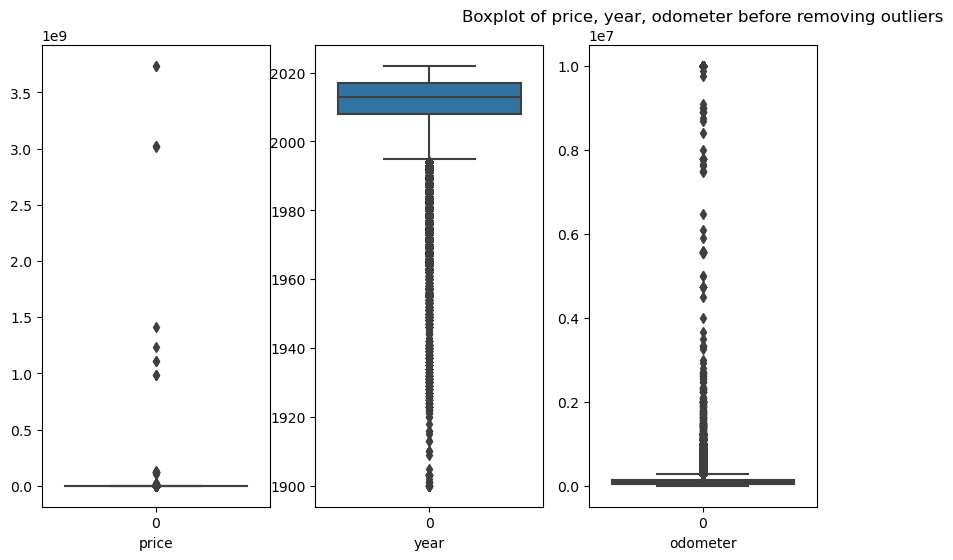

In [14]:
columns = ['price', 'year', 'odometer']
plt.figure(figsize=(10, 6))
for i in range(0, len(columns)):
    plt.subplot(1, 3, i+1)
    sns.boxplot(cars[columns[i]], orient='v')
    plt.xlabel(columns[i])
plt.title('Boxplot of price, year, odometer before removing outliers')
plt.savefig('images/boxplot_price_year_odometer_before_outliers.png')
plt.show()

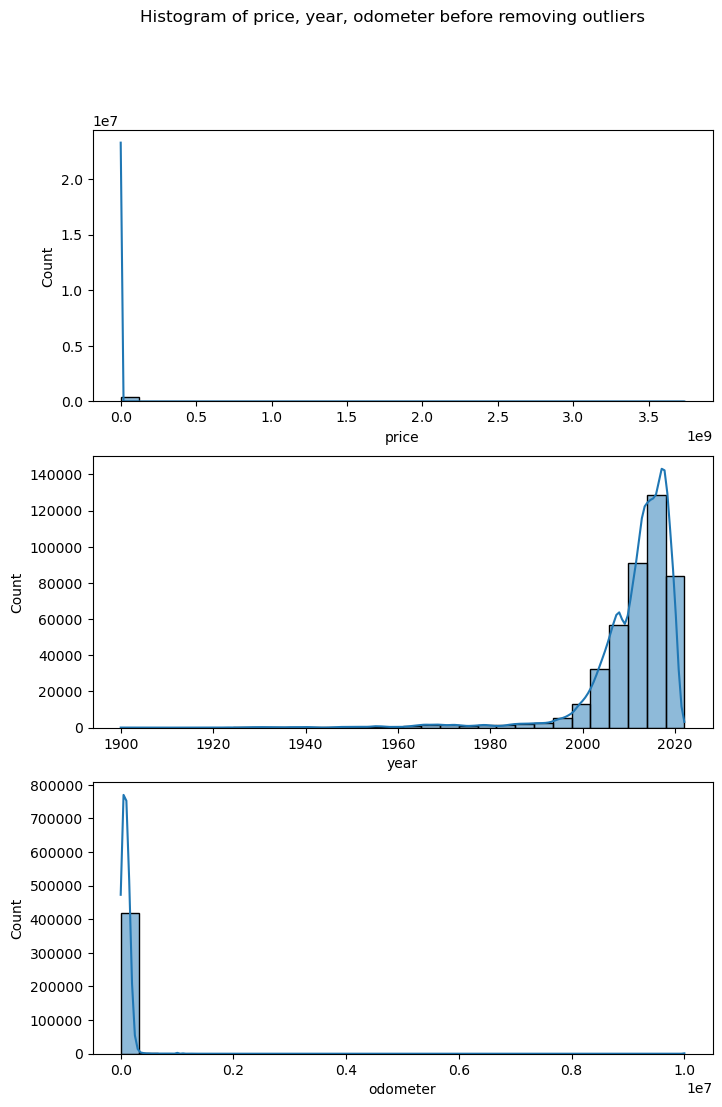

In [15]:
columns = ['price', 'year', 'odometer']
fig, axes = plt.subplots(3, 1, figsize=(8, 12))
fig.suptitle('Histogram of price, year, odometer before removing outliers')

for i, column in enumerate(columns):
    ax = axes[i]
    sns.histplot(data=cars, x=column, kde=True, bins=30, ax=ax)
    ax.set_xlabel(column)
plt.savefig('images/histogram_price_year_odometer_before_outliers.png')
plt.show()

## Exploratory Data Analysis


In [16]:
cars.describe().T

,count,mean,std,min,25%,50%,75%,max
id,426880.0,7.311487e+09,4.473170e+06,7.207408e+09,7.308143e+09,7.312621e+09,7.315254e+09,7.317101e+09
price,426880.0,7.519903e+04,1.218228e+07,0.000000e+00,5.900000e+03,1.395000e+04,2.648575e+04,3.736929e+09
year,425675.0,2.011235e+03,9.452120e+00,1.900000e+03,2.008000e+03,2.013000e+03,2.017000e+03,2.022000e+03
odometer,422480.0,9.804333e+04,2.138815e+05,0.000000e+00,3.770400e+04,8.554800e+04,1.335425e+05,1.000000e+07


In [17]:
cars.describe(include='object').T

,count,unique,top,freq
region,426880,404,columbus,3608
manufacturer,409234,42,ford,70985
model,421603,29649,f-150,8009
condition,252776,6,good,121456
cylinders,249202,8,6 cylinders,94169
fuel,423867,5,gas,356209
title_status,418638,6,clean,405117
transmission,424324,3,automatic,336524
VIN,265838,118246,1FMJU1JT1HEA52352,261
drive,296313,3,4wd,131904


In [18]:
# Finding unique values in each column for object type columns
unique_objects = {}
for column in cars.columns:
    if cars[column].dtype == 'object' and column not in ['region', 'model', 'state']:
        unique_objects[column] = cars[column].unique()
unique_objects


{'manufacturer': array([nan, 'gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'nissan', 'ram',
        'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar', 'buick',
        'chrysler', 'volvo', 'audi', 'infiniti', 'lincoln', 'alfa-romeo',
        'subaru', 'acura', 'hyundai', 'mercedes-benz', 'bmw', 'mitsubishi',
        'volkswagen', 'porsche', 'kia', 'rover', 'ferrari', 'mini',
        'pontiac', 'fiat', 'tesla', 'saturn', 'mercury', 'harley-davidson',
        'datsun', 'aston-martin', 'land rover', 'morgan'], dtype=object),
 'condition': array([nan, 'good', 'excellent', 'fair', 'like new', 'new', 'salvage'],
       dtype=object),
 'cylinders': array([nan, '8 cylinders', '6 cylinders', '4 cylinders', '5 cylinders',
        'other', '3 cylinders', '10 cylinders', '12 cylinders'],
       dtype=object),
 'fuel': array([nan, 'gas', 'other', 'diesel', 'hybrid', 'electric'], dtype=object),
 'title_status': array([nan, 'clean', 'rebuilt', 'lien', 'salvage', 'missing',
        'parts only'

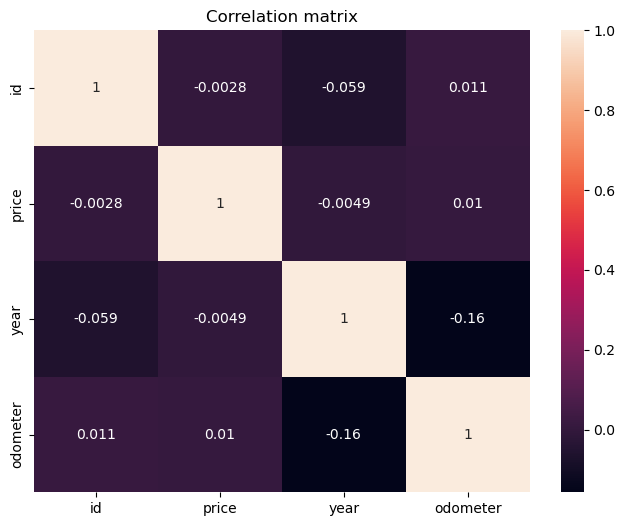

In [19]:
plt.figure(figsize=(8,6))
sns.heatmap(cars.corr(numeric_only=True), annot=True)
plt.title('Correlation matrix')
plt.savefig('images/correlation_matrix.png')
plt.show()



/Users/gvalleru/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/fp/zs1yf5qx3b17q8by63lvgyrc0000gn/T/ipykernel_68531/437294796.py:2: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


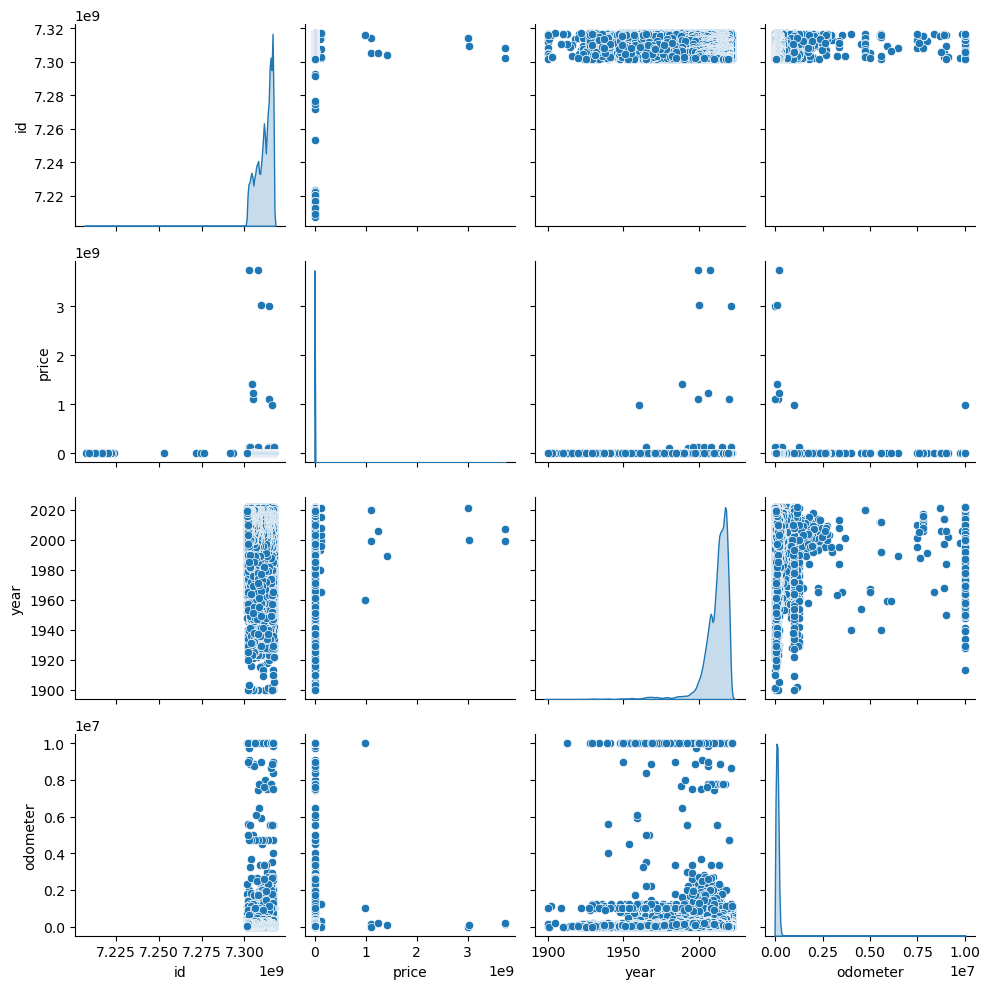

In [20]:
sns.pairplot(cars, diag_kind='kde')
plt.tight_layout()
plt.show()


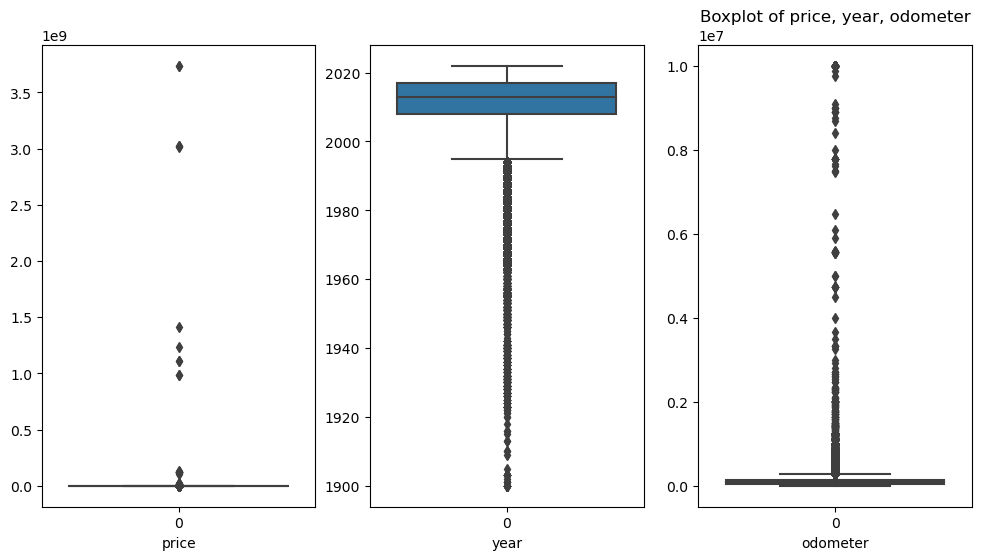

In [21]:
columns = ['price', 'year', 'odometer']
plt.figure(figsize=(12, 6))
for i in range(0, len(columns)):
    plt.subplot(1, 3, i+1)
    sns.boxplot(cars[columns[i]], orient='v')
    plt.xlabel(columns[i])
plt.title('Boxplot of price, year, odometer')
plt.show()



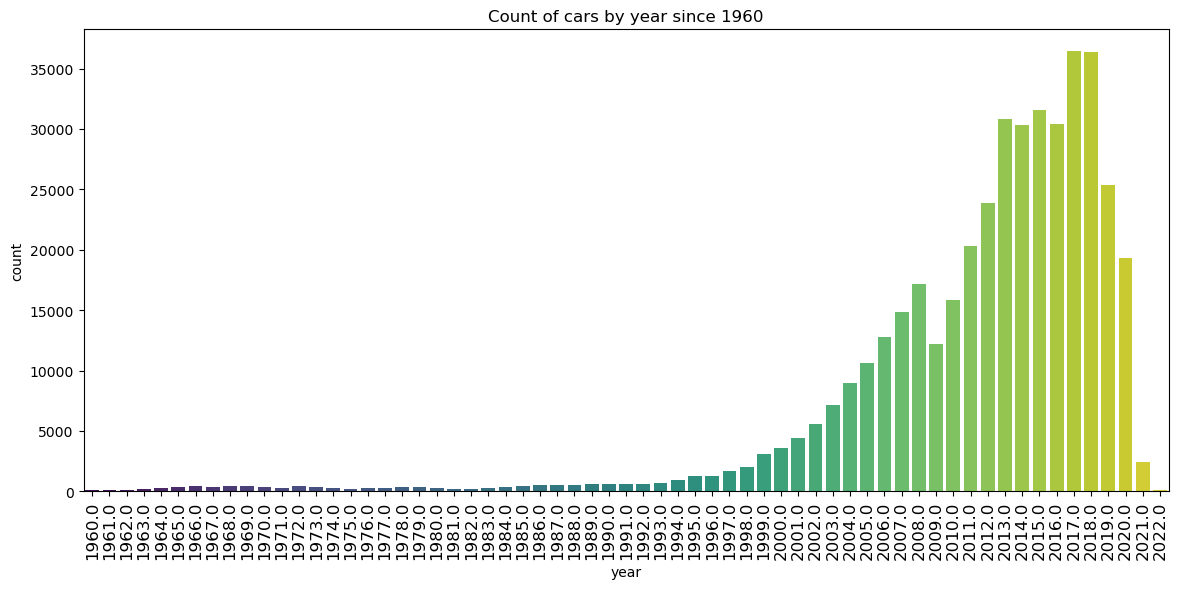

In [22]:
plt.figure(figsize=(14, 6))
ax = sns.countplot(x='year', data=cars[cars['year'] >= 1960], palette='viridis')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=12)
plt.title('Count of cars by year since 1960')
plt.savefig('images/count_of_cars_by_year_since_1960.png')
plt.show()


In [23]:
sorted_manufacturer = cars.groupby('manufacturer')['price'].mean().sort_values(ascending=False).reset_index()


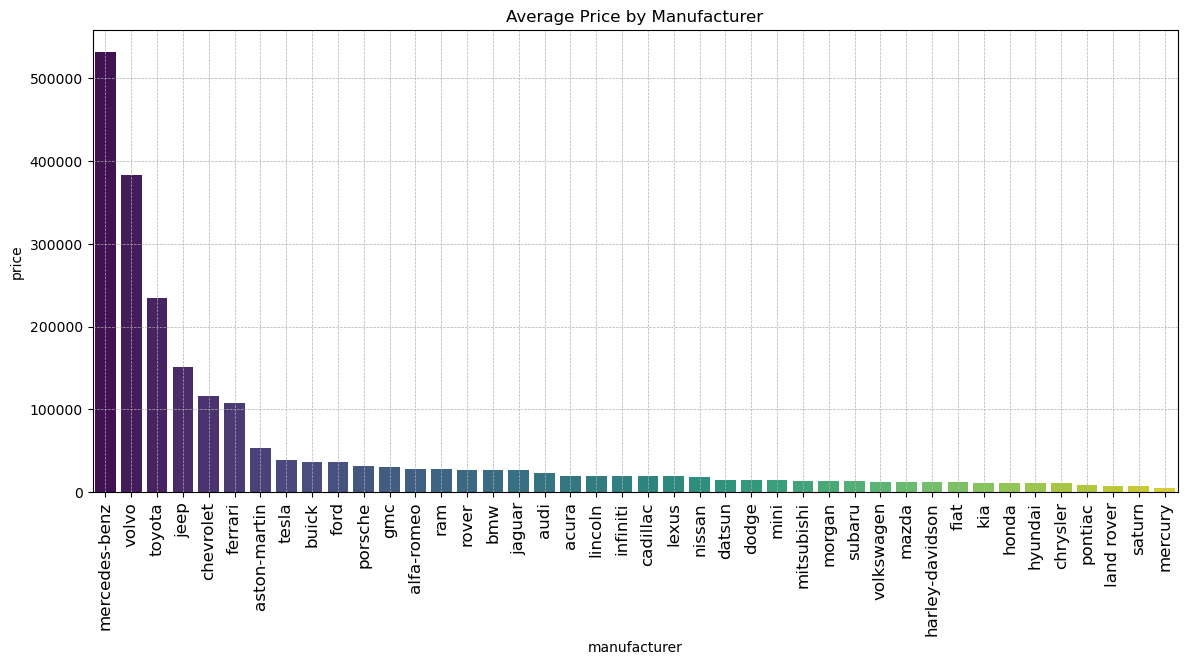

In [24]:
plt.figure(figsize=(14, 6))
ax = sns.barplot(x='manufacturer', y='price', data=sorted_manufacturer, palette='viridis')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=12)
plt.title('Average Price by Manufacturer')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig('images/average_price_by_manufacturer.png')
plt.show()



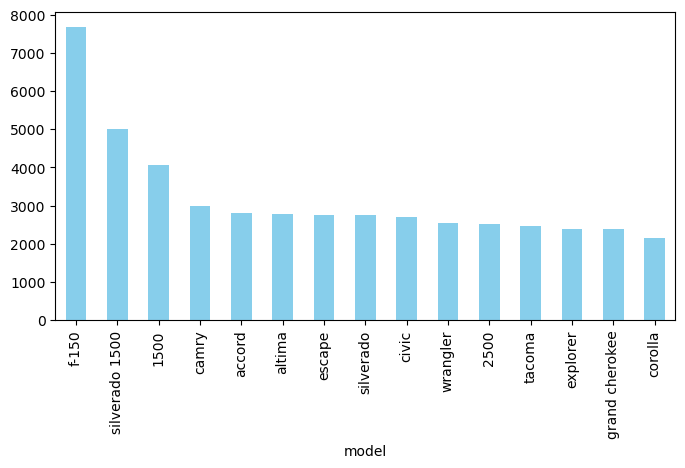

In [25]:
# Top 15 cars in the past 20 years
cars[cars['year'] >= 2000]['model'].value_counts().head(15).plot.bar(figsize=(8, 4), color='skyblue')
plt.savefig('images/top_15_cars_in_the_past_20_years.png')
plt.show()


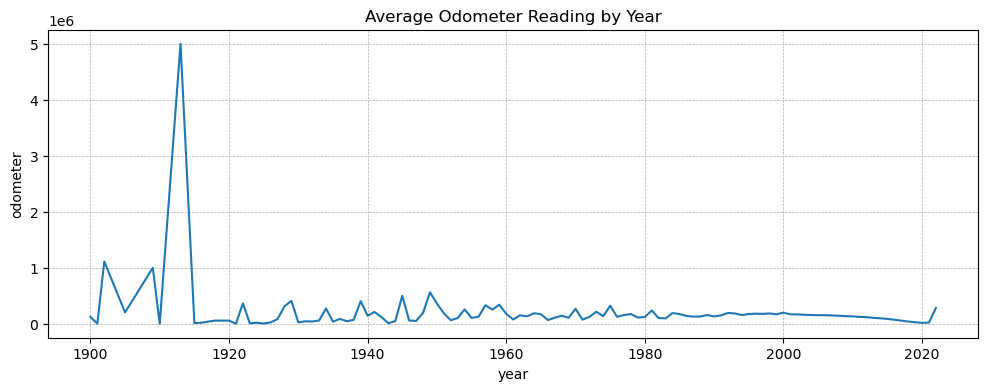

In [26]:
# Average Odomater reding by year
cars_year_odometer = cars.groupby('year')['odometer'].mean().reset_index()
plt.figure(figsize=(12, 4))
sns.lineplot(x='year', y='odometer', data=cars_year_odometer)
plt.title('Average Odometer Reading by Year')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig('images/average_odometer_reading_by_year.png')
plt.show()


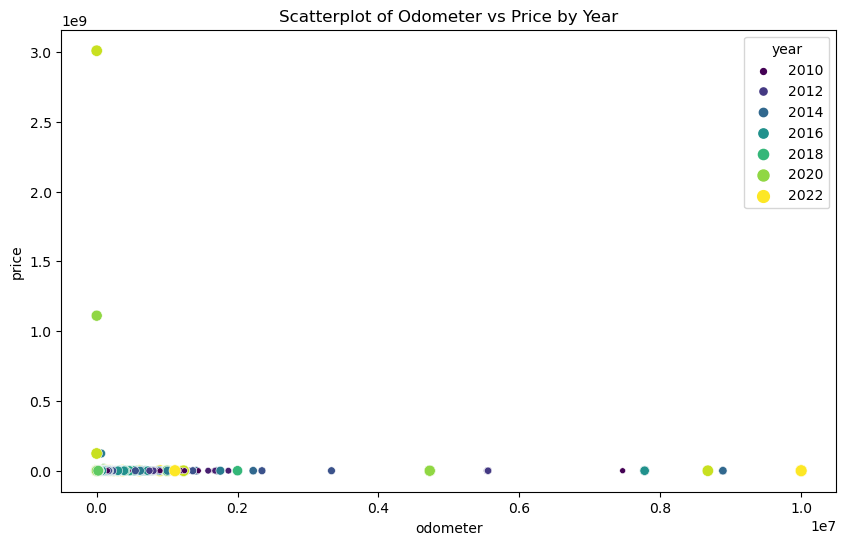

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='odometer', y='price', data=cars[cars['year'] >= 2010 ], hue='year', size='year', palette='viridis')
plt.title('Scatterplot of Odometer vs Price by Year')
plt.savefig('images/scatterplot_odometer_price_year.png')
plt.show()



['gas', 'other', 'diesel', 'hybrid', 'electric']


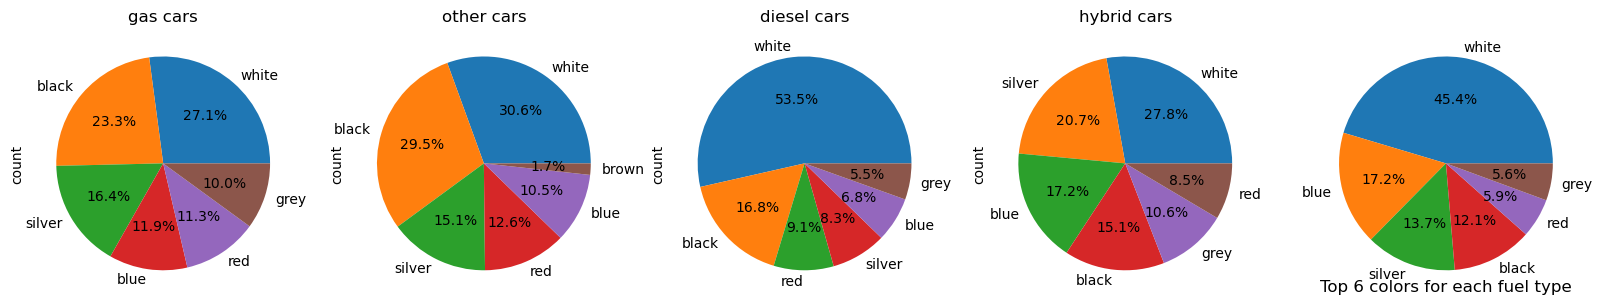

In [28]:
# Top 6 colors for each fuel type
unique_fuels = list(cars['fuel'].dropna().unique())
print(unique_fuels)
plt.figure(figsize=(4*len(unique_fuels), 5))
for index, fuel in enumerate(unique_fuels):
    plt.subplot(1, len(unique_fuels), index+1)
    cars[cars['fuel'] == fuel]['paint_color'].value_counts().head(6).plot.pie(autopct='%1.1f%%', title=f'{fuel} cars')
plt.axis('off')
plt.title('Top 6 colors for each fuel type', y=-0.01)
plt.savefig('images/top_6_colors_for_each_fuel_type.png')
plt.show()


From above box plots and histograms of `price`, `year`, `odometer`, we can see that there are some outliers in the data with `price` and `odometer` right skewed and we have have car models older than 25 years. We can remove them by using IQR method.

## Data Preparation
After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling. Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with sklearn.



From above box plots and histograms of `price`, `year`, `odometer`, we can see that there are some outliers in the data with `price` and `odometer` right skewed and we have have car models older than 25 years. We can remove them by using IQR method.

#### Descriptive Statistics Summary

* The year ranges from 1900 to 2022, suggesting good possibility for inaccuracies or outliers.
* The price shows extreme variance, ranging from 0 to over 3 Billion, indicating potential outliers or incorrect entries.
* The odometer readings also show extreme values up to 10 million, which might be outliers or errors.

#### Missing Values Summary

* Significant missing data in columns such as condition, cylinders, VIN, drive, size, type, and paint_color.
* Less critical but still notable missing values in year, manufacturer, model, fuel, title_status and transmission.

#### Proposed Data Preparation Steps

**Handling outliers:**

* Remove cars older than 20 years from `year` i.e `year < 2000` as most of buyers are not interested in cars older than 20 years and they may not be able to find replacement parts easily.
* Remove outliers in `price` and `odometer` using IQR method.
* Drop rows with miles/year >= 30k.

**Handling Missing Values:**

* For missing `odometer` use mean for that year.
* Drop missing values for 'year' as they are only ~1200 out of 450k rows, then converting 'year' to int64.
* Drop type `bus` and title_status with `parts only`.
* For column `fuel` as `electric` i.e electric cars set appropriate values for 'cylinders' and 'transmission' i.e `0` and `automatic`.
* Remove models or manufacturer with Freightliner, International 4300, WORKHORSE  as they are trucks not cars using varaiable remove_models_containing.
* Using manufacturer_map to fill in null manufacturer.


**Drop columns which have no effect and unuseful rows:**
* Drop `id` and `VIN` columns.
* Drop columns like `model` which have too many unique values to be useful. Keep model for EDA and then drop it.

**Feature Engineering:**

* Calculate `car age` from the `year`.
* Categorize odometer into bands (e.g., `low`, `medium`, `high` mileage).

**Encoding Categorical Data:**

* One-hot encode categorical variables such as `manufacturer`, `fuel`, `drive`, and `transmission` for use in modeling.


In [29]:
cars_final = cars.copy()

### Handling Missing Values

In [30]:
# Drop type `bus` and title_status with `parts only`.
print(f'cars shape before cleaning: {cars_final.shape}')
cars_final = cars_final[cars_final['type'] != 'bus']
print(f'cars shape after removing type bus: {cars_final.shape}')
cars_final = cars_final[cars_final['title_status'] != 'parts only']
print(f'cars shape after removing title_status parts only: {cars_final.shape}')

cars shape before cleaning: (426880, 18)
cars shape after removing type bus: (426363, 18)
cars shape after removing title_status parts only: (426165, 18)


In [31]:
# Remove models or manufacturer with Freightliner, International 4300, WORKHORSE  as they
# are trucks not cars using varaiable remove_models_containing.
print(f'cars shape before cleaning: {cars_final.shape}')
cars_final = cars_final[~cars_final['model'].str.contains('|'.join(remove_models_containing).lower(), case=False, na=False)]
print(f'cars shape after removing models containing remove_models_containing: {cars_final.shape}')

cars shape before cleaning: (426165, 18)
cars shape after removing models containing remove_models_containing: (423286, 18)


In [173]:
# For electric cars set appropriate values for 'cylinders' and 'transmission'. We have ~ 1400 electic cars

# Electric cars do not have cylinders but making it similar to v8 engine
cars_final.loc[cars_final['fuel'] == 'electric', 'cylinders'] = '8'
 # Electirc car tranismission type is single-speed but most of the users are not familiar
 # with this term and see it as automatic
cars_final.loc[cars_final['fuel'] == 'electric', 'transmission'] = 'automatic'
cars_final.loc[cars_final['fuel'] == 'electric'].head(3)


,region,price,year,manufacturer,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
680,birmingham,23590,2018.0,mitsubishi,8,electric,48933.0,clean,automatic,4wd,SUV,white,al
757,birmingham,29890,2013.0,tesla,8,electric,61591.0,clean,automatic,rwd,sedan,grey,al
988,birmingham,32990,2013.0,tesla,8,electric,69961.0,clean,automatic,rwd,sedan,white,al


In [174]:
# Using manufacturer_map to fill in null manufacturer.
print(f'null manufacturer count before filling: {cars_final.isnull().sum()["manufacturer"]}')

def infer_manufacturer(row):
    if pd.isnull(row['manufacturer']):
        for key in manufacturer_map:
            if key in str(row['model']).lower():
                return manufacturer_map[key]
    return row['manufacturer']

cars_final['manufacturer'] = cars_final.apply(infer_manufacturer, axis=1)
print(f'null manufacturer count after filling: {cars_final.isnull().sum()["manufacturer"]}')


null manufacturer count before filling: 0
null manufacturer count after filling: 0


In [175]:
# By using manufacturer_map we brought down the null manufacturer count from 4.1% to 0.65%.
missing_percentage = cars_final.isnull().sum() / cars_final.shape[0] * 100
missing_percentage[missing_percentage > 0]

Series([], dtype: float64)

In [176]:
# Finding unique values in each column for object type columns
unique_objects = {}
for column in cars_final.columns:
    if cars_final[column].dtype == 'object' and column not in ['region', 'model', 'state', 'VIN']:
        unique_objects[column] = cars_final[column].unique()
unique_objects


{'manufacturer': array(['gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'nissan', 'ram',
        'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar', 'buick',
        'chrysler', 'volvo', 'audi', 'infiniti', 'lincoln', 'alfa-romeo',
        'subaru', 'scion', 'acura', 'hyundai', 'mercedes-benz', 'bmw',
        'mitsubishi', 'smart fortwo', 'volkswagen', 'porsche', 'kia',
        'maserati', 'suzuki', 'rover', 'mini', 'pontiac', 'fiat',
        'genesis', 'isuzu', 'tesla', 'saturn', 'mercury', 'saab',
        'harley-davidson', 'datsun', 'lotus', 'aston-martin', 'land rover',
        'morgan', 'ferrari'], dtype=object),
 'cylinders': array([8, 6, 4, 3, 5, 10, 0, '8', 12], dtype=object),
 'fuel': array(['gas', 'diesel', 'hybrid', 'electric'], dtype=object),
 'title_status': array(['clean', 'rebuilt', 'lien', 'salvage', 'missing'], dtype=object),
 'transmission': array(['automatic', 'manual', 'single_speed'], dtype=object),
 'drive': array(['4wd', 'rwd', 'fwd'], dtype=object),
 'type':

We still need to impute below.

* `manufacturer`, `condition`, `fuel`, `title_status`, `drive`, `size` and `paint_color` with nan.
* `cylinders`, `transmission`, `type` with `other` and `nan`.


In [36]:
# By using manufacturer_map we brought down the null manufacturer count from 4.1% to 0.65%.
missing_percentage = cars_final.isnull().sum() / cars_final.shape[0] * 100
missing_percentage[missing_percentage > 0]

year             0.284677
manufacturer     1.619000
model            1.241005
condition       40.768653
cylinders       41.224137
fuel             0.687951
odometer         1.017752
title_status     1.923286
transmission     0.571245
VIN             37.538685
drive           30.416314
size            71.788342
type            21.550441
paint_color     30.479865
dtype: float64

In [37]:
# For columns ['manufacturer', 'cylinders', 'fuel', 'transmission', 'drive', 'size', 'type'] use
# `model` create a map with most popular i.e mode with key as model and value as the columns.
# Use this map to impute columns.

import re

columns = ['manufacturer', 'cylinders', 'fuel', 'transmission', 'drive', 'size', 'type']

for column in columns:
    # Step 1: Generate model_to_column mapping
    model_to_column = cars_final[cars_final[column] != 'other'].groupby('model')[column].agg(
        lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

    # Step 2: Define the function to infer cylinders from model
    def infer_column_from_model(row):
        if pd.isnull(row[column]) or row[column] == 'other':
            model_key = str(row['model']).lower()
            # Find the longest matching key in the dictionary
            longest_match = None
            max_length = 0
            for key in model_to_column:
                if key in model_key and len(key) > max_length:
                    max_length = len(key)
                    longest_match = key
            if longest_match:
                return model_to_column[longest_match]
        return row[column]

    # Convert to dictionary and process keys to exclude models with special characters except numbers, spaces, and hyphens
    model_to_column = {k.lower(): v for k, v in model_to_column.items() if isinstance(k, str) and re.match(r'^[a-zA-Z0-9\s\-]+$', k)}

    print(f'null and "other" {column} count before filling: {cars_final[column].isnull().sum()}, {cars_final[cars_final[column] == "other"].shape[0]}')

    # Apply function to DataFrame
    cars_final[column] = cars_final.apply(infer_column_from_model, axis=1)
    print(f'null and "other" {column} count after filling: {cars_final[column].isnull().sum()}, {cars_final[cars_final[column] == "other"].shape[0]}')


null and "other" manufacturer count before filling: 6853, 0
null and "other" manufacturer count after filling: 5452, 0
null and "other" cylinders count before filling: 174496, 1034
null and "other" cylinders count after filling: 33799, 1
null and "other" fuel count before filling: 2912, 30550
null and "other" fuel count after filling: 755, 5
null and "other" transmission count before filling: 2418, 61706
null and "other" transmission count after filling: 137, 83
null and "other" drive count before filling: 128748, 0
null and "other" drive count after filling: 22411, 0
null and "other" size count before filling: 303870, 0
null and "other" size count after filling: 78865, 0
null and "other" type count before filling: 91220, 21901
null and "other" type count after filling: 12113, 85


In [40]:
cars_final.to_csv('data/cars_final_after_infer_column_from_model.csv', index=False)

In [105]:
cars_final = pd.read_csv('data/cars_final_after_infer_column_from_model.csv')

In [106]:
# By using manufacturer_map we brought down the null manufacturer count from 4.1% to 0.65%.
missing_percentage = cars_final.isnull().sum() / cars_final.shape[0] * 100
missing_percentage[missing_percentage > 0]

year             0.284677
manufacturer     1.288018
model            1.241005
condition       40.768653
cylinders        7.984909
fuel             0.178366
odometer         1.017752
title_status     1.923286
transmission     0.032366
VIN             37.538685
drive            5.294529
size            18.631611
type             2.861659
paint_color     30.479865
dtype: float64

After using infer_column_from_model to figureout `null` and `other` values for ['manufacturer', 'cylinders', 'fuel', 'transmission', 'drive', 'size', 'type'], we were able to reduce missing data percent to mostly single digit % multiple columns.

**nan Values**

* manufacturer: 4.13% to 1.28%.
* cylinders: 41.62% to 7.98%.
* fuel: 0.7% to 0.17%.
* transmission: 0.6% to 0.03%.
* drive: 30.58% to 5.29%.
* size: 71.77% to 18.63%.
* type: 21.75% to 2.86%.

**other values**

* cylinders: 1034 to 1
* fuel: 30550 to 5
* transmission: 61706 to 83
* type: 21901 to 85


In [107]:
# Remove `size` column.
cars_final.drop(columns=['size'], inplace=True)

impute cylinders, fuel, transmission, drive and type for a particular row based on the most popular value of the same for the same manufacturer.


In [108]:
def safe_mode(series):
    # Attempt to get the mode
    try:
        mode_val = series.mode()
        if mode_val.empty:
            return np.nan
        else:
            return mode_val.iloc[0]
    except:
        return np.nan

# Apply the safe_mode function to each relevant column in the grouped DataFrame
modes = cars_final.groupby('manufacturer')[['cylinders', 'fuel', 'transmission', 'drive', 'type', 'paint_color']].agg(safe_mode).reset_index()

mode_dict = {}
for _, row in modes.iterrows():
    mode_dict[row['manufacturer']] = {
        'cylinders': row['cylinders'][0] if isinstance(row['cylinders'], pd.Series) else row['cylinders'],
        'fuel': row['fuel'][0] if isinstance(row['fuel'], pd.Series) else row['fuel'],
        'transmission': row['transmission'][0] if isinstance(row['transmission'], pd.Series) else row['transmission'],
        'drive': row['drive'][0] if isinstance(row['drive'], pd.Series) else row['drive'],
        'type': row['type'][0] if isinstance(row['type'], pd.Series) else row['type'],
        'paint_color': row['paint_color'][0] if isinstance(row['paint_color'], pd.Series) else row['paint_color'],
    }

def impute_values(row):
    manufacturer = row['manufacturer']
    if pd.isnull(row['cylinders']) and manufacturer in mode_dict:
        row['cylinders'] = mode_dict[manufacturer]['cylinders']
    if pd.isnull(row['fuel']) and manufacturer in mode_dict:
        row['fuel'] = mode_dict[manufacturer]['fuel']
    if pd.isnull(row['transmission']) and manufacturer in mode_dict:
        row['transmission'] = mode_dict[manufacturer]['transmission']
    if pd.isnull(row['drive']) and manufacturer in mode_dict:
        row['drive'] = mode_dict[manufacturer]['drive']
    if pd.isnull(row['type']) and manufacturer in mode_dict:
        row['type'] = mode_dict[manufacturer]['type']
    if pd.isnull(row['paint_color']) and manufacturer in mode_dict:
        row['paint_color'] = mode_dict[manufacturer]['paint_color']
    return row

# Apply the function to the DataFrame
cars_final = cars_final.apply(impute_values, axis=1)


In [109]:
missing_percentage = cars_final.isnull().sum() / cars_final.shape[0] * 100
missing_percentage[missing_percentage > 0]

year             0.284677
manufacturer     1.288018
model            1.241005
condition       40.768653
cylinders        0.487850
fuel             0.023152
odometer         1.017752
title_status     1.923286
transmission     0.009450
VIN             37.538685
drive            0.490449
type             0.492811
paint_color      0.593216
dtype: float64

In [110]:
print(f'shape of cars_final before removing rows: {cars_final.shape}')
columns = ['manufacturer', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color']

for column in columns:
    cars_final = cars_final[cars_final[column] != 'other']
    cars_final = cars_final[cars_final[column].notnull()]
    cars_final.reset_index(drop=True, inplace=True)
    print(f'shape of cars_final after removing rows with null and "others" of {column}: {cars_final.shape}')

shape of cars_final before removing rows: (423286, 17)


shape of cars_final after removing rows with null and "others" of manufacturer: (417834, 17)
shape of cars_final after removing rows with null and "others" of cylinders: (417834, 17)
shape of cars_final after removing rows with null and "others" of fuel: (417834, 17)
shape of cars_final after removing rows with null and "others" of title_status: (409886, 17)
shape of cars_final after removing rows with null and "others" of transmission: (409805, 17)
shape of cars_final after removing rows with null and "others" of drive: (409805, 17)
shape of cars_final after removing rows with null and "others" of type: (409801, 17)
shape of cars_final after removing rows with null and "others" of paint_color: (409801, 17)


In [111]:
missing_percentage = cars_final.isnull().sum() / cars_final.shape[0] * 100
missing_percentage[missing_percentage > 0]

year          0.153245
model         1.257440
condition    40.925230
odometer      0.887504
VIN          37.732948
dtype: float64

In [112]:
# Remove model, condition, VIN columns
cars_final.drop(columns=['id', 'model', 'condition', 'VIN'], inplace=True)

In [113]:
missing_percentage = cars_final.isnull().sum() / cars_final.shape[0] * 100
missing_percentage[missing_percentage > 0]

year        0.153245
odometer    0.887504
dtype: float64

In [114]:
cars_final.reset_index(drop=True, inplace=True)

In [115]:
cars_final.corr(numeric_only=True)


,price,year,odometer
price,1.000000,-0.005340,0.010977
year,-0.005340,1.000000,-0.167377
odometer,0.010977,-0.167377,1.000000


In [116]:
# Drop rows with miles/year >= 30k
print(f'cars shape before cleaning: {cars_final.shape}')
cars_final['miles_per_year'] = cars_final['odometer'] / (2022 - cars_final['year'] + 1)
cars_final = cars_final[cars_final['miles_per_year'] < 30000]
cars_final.drop(columns=['miles_per_year'], inplace=True)
print(f'cars shape after removing cars with miles/year >= 30k: {cars_final.shape}')
cars_final.reset_index(drop=True, inplace=True)

cars shape before cleaning: (409801, 13)
cars shape after removing cars with miles/year >= 30k: (404064, 13)


### Handling Outliers


In [117]:
# Remove cars older than 20 years from `year` i.e `year < 2000`.
print(f'Cars shape before cleaning: {cars.shape}')
cars_final = cars_final[cars_final['year'] >= 2000]
print(f'Cars shape after removing cars with year less than 2000: {cars_final.shape}')


Cars shape before cleaning: (426880, 18)
Cars shape after removing cars with year less than 2000: (381461, 13)


In [118]:
# Try to remove outliers in `price` and `odometer` using IQR method.
q1_price = cars_final['price'].quantile(0.25)
q3_price = cars_final['price'].quantile(0.75)
IRQ_price = q3_price - q1_price

q1_odometer = cars_final['odometer'].quantile(0.25)
q3_odometer = cars_final['odometer'].quantile(0.75)
IRQ_odometer = q3_odometer - q1_odometer


lower_bound_price = q1_price - 1.5 * IRQ_price
upper_bound_price = q3_price + 1.5 * IRQ_price
print(f'Lower bound price: {lower_bound_price}')
print(f'Upper bound price: {upper_bound_price}')

lower_bound_odometer = q1_odometer - 1.5 * IRQ_odometer
upper_bound_odometer = q3_odometer + 1.5 * IRQ_odometer
print(f'Lower bound odometer: {lower_bound_odometer}')
print(f'upper bound odometer: {upper_bound_odometer}')


Lower bound price: -25000.0
Upper bound price: 58184.0
Lower bound odometer: -103797.0
upper bound odometer: 272131.0


In [119]:
# overriding the lower bounds for price and odometer with appropriate values from my educated guess to include high end cars.
lower_bound_price = 1000
lower_bound_odometer = 10


In [120]:
print(f'cars shape before cleaning: {cars_final.shape}')
cars_final = cars_final[(cars_final['price'] >= lower_bound_price) & (cars_final['price'] <= upper_bound_price)]
print(f'cars shape after removing outliers in price: {cars_final.shape}')
cars_final = cars_final[(cars_final['odometer'] >= lower_bound_odometer) & (cars_final['odometer'] <= upper_bound_odometer)]
print(f'cars shape after removing outliers in odometer: {cars_final.shape}')


cars shape before cleaning: (381461, 13)
cars shape after removing outliers in price: (335570, 13)
cars shape after removing outliers in odometer: (331897, 13)


In [146]:
cars_final['cylinders'].replace(' cylinders', '', regex=True, inplace=True)

In [161]:
# converting cylinders to int
cars_final['cylinders'] = cars_final['cylinders'].astype(int)

In [162]:
cars_final.reset_index(drop=True, inplace=True)

In [163]:
missing_percentage = cars_final.isnull().sum() / cars_final.shape[0] * 100
missing_percentage[missing_percentage > 0]

Series([], dtype: float64)

In [164]:
cars_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331897 entries, 0 to 331896
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        331897 non-null  object 
 1   price         331897 non-null  int64  
 2   year          331897 non-null  float64
 3   manufacturer  331897 non-null  object 
 4   cylinders     331897 non-null  int64  
 5   fuel          331897 non-null  object 
 6   odometer      331897 non-null  float64
 7   title_status  331897 non-null  object 
 8   transmission  331897 non-null  object 
 9   drive         331897 non-null  object 
 10  type          331897 non-null  object 
 11  paint_color   331897 non-null  object 
 12  state         331897 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 32.9+ MB


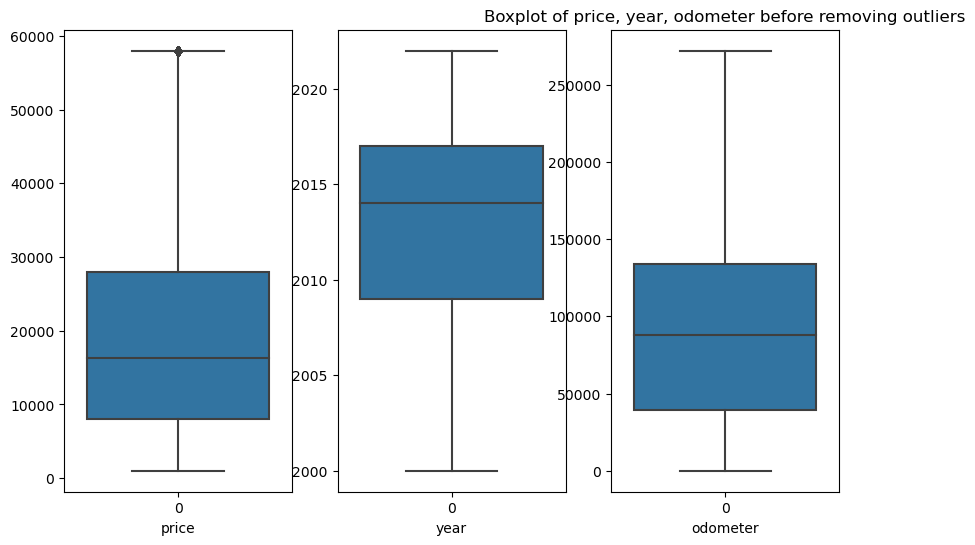

In [165]:
columns = ['price', 'year', 'odometer']
plt.figure(figsize=(10, 6))
for i in range(0, len(columns)):
    plt.subplot(1, 3, i+1)
    sns.boxplot(cars_final[columns[i]], orient='v')
    plt.xlabel(columns[i])
plt.title('Boxplot of price, year, odometer before removing outliers')
plt.savefig('images/boxplot_price_year_odometer_before_outliers.png')
plt.show()

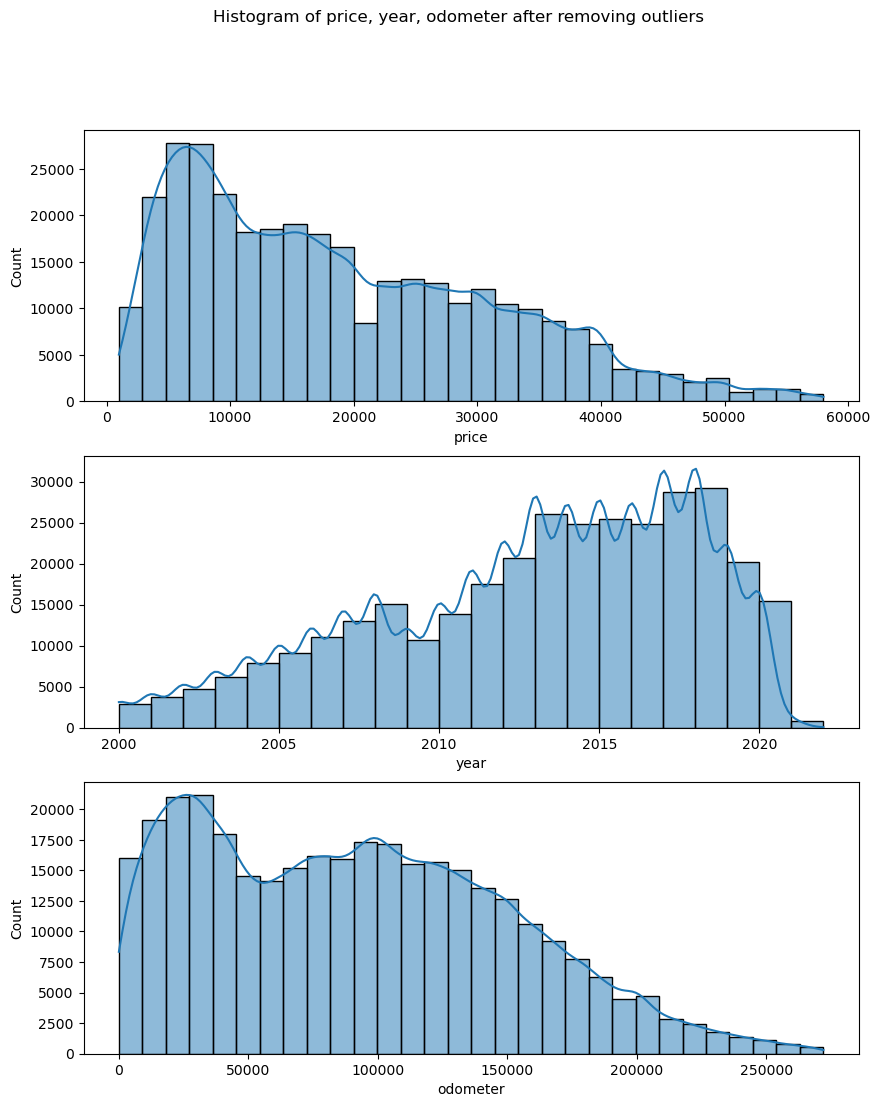

In [166]:
columns = ['price', 'year', 'odometer']
fig, axes = plt.subplots(3, 1, figsize=(10, 12))
fig.suptitle('Histogram of price, year, odometer after removing outliers')
for i, column in enumerate(columns):
    ax = axes[i]
    bins = 30
    if column == 'year':
        bins = 22
    sns.histplot(data=cars_final, x=column, kde=True, bins=bins, ax=ax)
    ax.set_xlabel(column)
plt.savefig('images/histogram_price_year_odometer_after_outliers.png')
plt.show()

## Pre-Processing

* Categorical:
  * One hot encoding
  * target encoding?
  * Ordinal encoding
* numerical:
  * standard scaling
  * log transformation?
* Test train split
  * scaling after test split
* Imputation after test train split


In [167]:
cars_pp = cars_final.copy()

In [168]:
cars_pp.head()

,region,price,year,manufacturer,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
0,auburn,33590,2014.0,gmc,8,gas,57923.0,clean,automatic,4wd,pickup,white,al
1,auburn,22590,2010.0,chevrolet,8,gas,71229.0,clean,automatic,4wd,pickup,blue,al
2,auburn,39590,2020.0,chevrolet,8,gas,19160.0,clean,automatic,4wd,pickup,red,al
3,auburn,30990,2017.0,toyota,8,gas,41124.0,clean,automatic,4wd,pickup,red,al
4,auburn,15000,2013.0,ford,6,gas,128000.0,clean,automatic,rwd,truck,black,al


In [169]:
cars_pp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331897 entries, 0 to 331896
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        331897 non-null  object 
 1   price         331897 non-null  int64  
 2   year          331897 non-null  float64
 3   manufacturer  331897 non-null  object 
 4   cylinders     331897 non-null  int64  
 5   fuel          331897 non-null  object 
 6   odometer      331897 non-null  float64
 7   title_status  331897 non-null  object 
 8   transmission  331897 non-null  object 
 9   drive         331897 non-null  object 
 10  type          331897 non-null  object 
 11  paint_color   331897 non-null  object 
 12  state         331897 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 32.9+ MB


In [170]:
# Drop columns which we are not going to use for prediction.
drop_columns = ['region', 'paint_color', 'state']
cars_pp.drop(columns=drop_columns, inplace=True)

In [172]:
unique_objects = {}
for column in cars_pp.columns:
    if cars_pp[column].dtype == 'object':
        unique_objects[column] = cars_pp[column].unique()
unique_objects


{'manufacturer': array(['gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'nissan', 'ram',
        'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar', 'buick',
        'chrysler', 'volvo', 'audi', 'infiniti', 'lincoln', 'alfa-romeo',
        'subaru', 'scion', 'acura', 'hyundai', 'mercedes-benz', 'bmw',
        'mitsubishi', 'smart fortwo', 'volkswagen', 'porsche', 'kia',
        'maserati', 'suzuki', 'rover', 'mini', 'pontiac', 'fiat',
        'genesis', 'isuzu', 'tesla', 'saturn', 'mercury', 'saab',
        'harley-davidson', 'datsun', 'lotus', 'aston-martin', 'land rover',
        'morgan', 'ferrari'], dtype=object),
 'fuel': array(['gas', 'diesel', 'hybrid', 'electric'], dtype=object),
 'title_status': array(['clean', 'rebuilt', 'lien', 'salvage', 'missing'], dtype=object),
 'transmission': array(['automatic', 'manual', 'single_speed'], dtype=object),
 'drive': array(['4wd', 'rwd', 'fwd'], dtype=object),
 'type': array(['pickup', 'truck', 'coupe', 'SUV', 'convertible', 'hatchback

In [178]:
# One hot encoding for object columns
object_cols = ['manufacturer', 'fuel', 'transmission', 'drive', 'type']

cars_pp = pd.get_dummies(cars_pp, columns=object_cols, drop_first=True)

In [179]:
# Label encoding for title_status
title_status_mapping = {
    'clean': 4,     # Highest quality
    'rebuilt': 3,   # Repaired, next best
    'lien': 2,      # Neutral, ownership under lien
    'salvage': 1,   # Damaged significantly
    'missing': 0    # No title, most problematic
}
cars_pp['title_status'] = cars_pp['title_status'].map(title_status_mapping)



In [183]:
cars_pp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331897 entries, 0 to 331896
Data columns (total 71 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   price                         331897 non-null  int64  
 1   year                          331897 non-null  float64
 2   cylinders                     331897 non-null  int64  
 3   odometer                      331897 non-null  float64
 4   title_status                  331897 non-null  int64  
 5   manufacturer_alfa-romeo       331897 non-null  bool   
 6   manufacturer_aston-martin     331897 non-null  bool   
 7   manufacturer_audi             331897 non-null  bool   
 8   manufacturer_bmw              331897 non-null  bool   
 9   manufacturer_buick            331897 non-null  bool   
 10  manufacturer_cadillac         331897 non-null  bool   
 11  manufacturer_chevrolet        331897 non-null  bool   
 12  manufacturer_chrysler         331897 non-nul

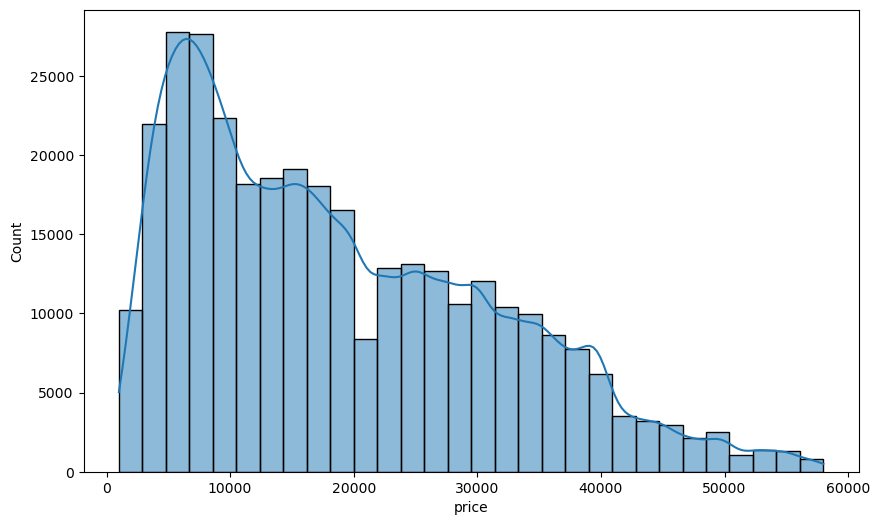

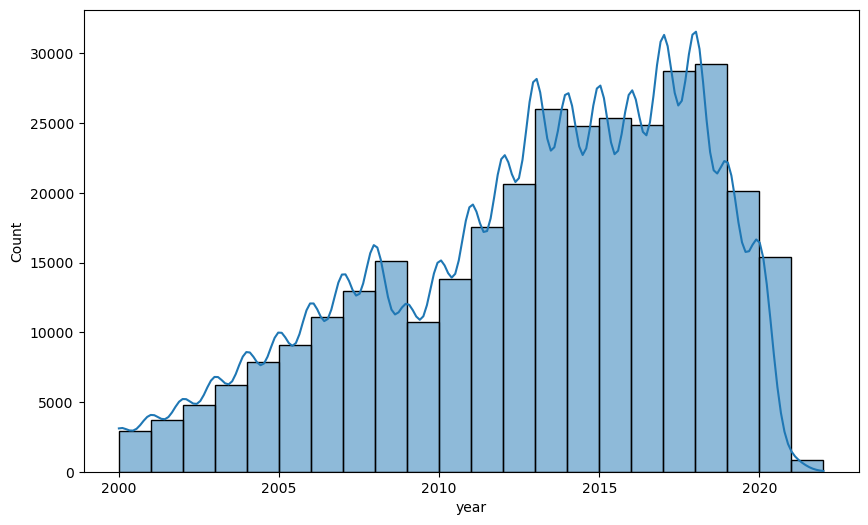

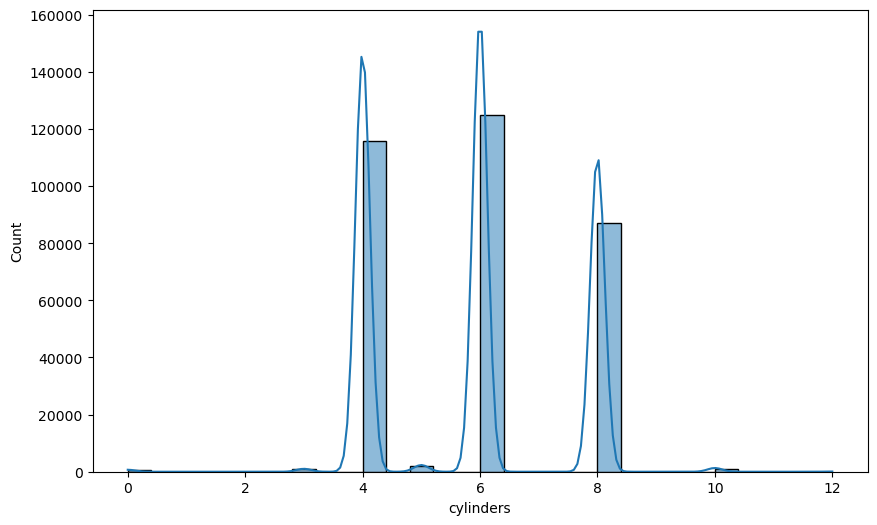

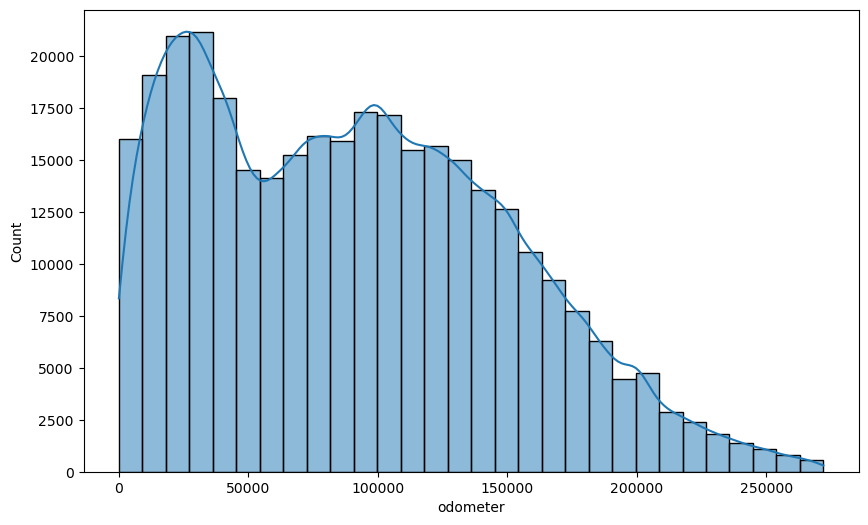

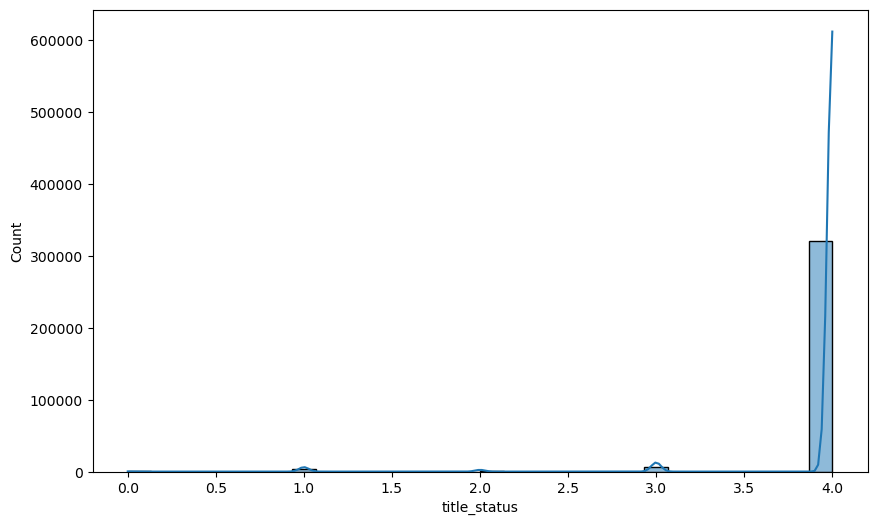

In [185]:
for column in cars_pp.columns:
    if cars_pp[column].dtype not in ['object', 'bool']:
        bins = 30
        if column == 'year':
            bins = 22
        plt.figure(figsize=(10, 6))
        sns.histplot(cars_pp[column], kde=True, bins=bins)
        plt.show()

### Test, train split


In [187]:
X = cars_pp.drop(columns='price')
y = cars_pp['price']

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

## Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

* Models:
  * linear
  * Lasso
  * ridge

### Linear regression

In [194]:
linear_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])
linear_pipeline

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [195]:
linear_pipeline.fit(X_train, y_train)
y_pred = linear_pipeline.predict(X_test)

In [196]:
mse_linear = mean_squared_error(y_test, y_pred)
rmsq_linear = np.sqrt(mse_linear)
r2 = linear_pipeline.score(X_test, y_test)
print(f'Linear Regression MSE: {mse_linear}')
print(f'Linear Regression RMSE: {rmsq_linear}')
print(f'Linear Regression R2: {r2}')

Linear Regression MSE: 35314985.21835035
Linear Regression RMSE: 5942.641266166952
Linear Regression R2: 0.7747321933040938


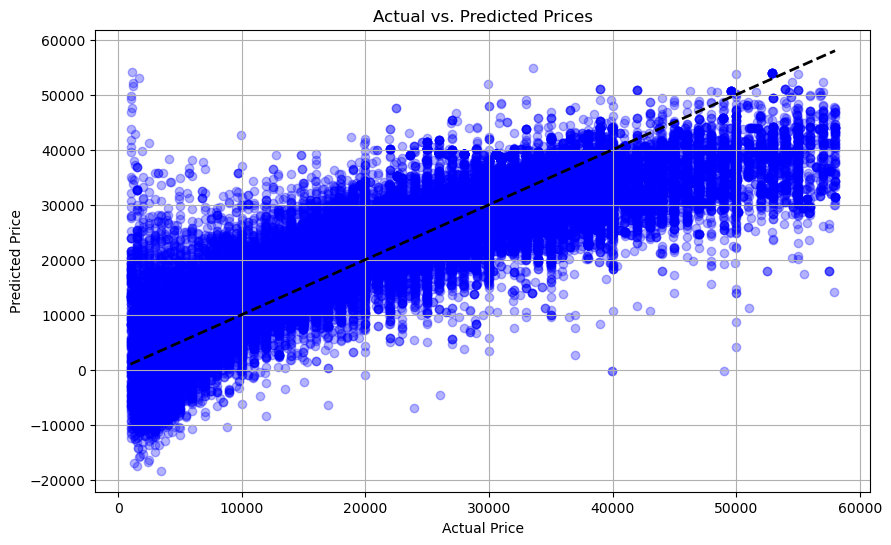

In [197]:
# Scatter plot of Actual vs. Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3, color='blue')  # plot actual vs predicted values as scatter plot
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # a diagonal line where actual = predicted
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.show()


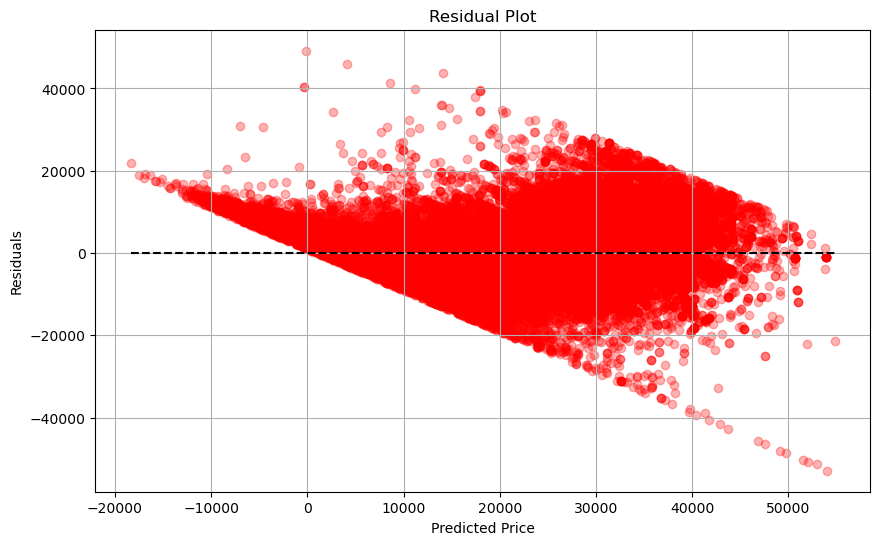

In [198]:
# Residual plot
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.3, color='red')
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='black', linestyles='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


### Ridge Regression

In [199]:
selector_pipeline = Pipeline([
    ('selector', SequentialFeatureSelector(LinearRegression())),
    ('model', LinearRegression())
])
selector_pipeline

Pipeline(steps=[('selector',
                 SequentialFeatureSelector(estimator=LinearRegression())),
                ('model', LinearRegression())])

In [206]:
param_dict = {'selector__n_features_to_select': [2, 3, 4, 5, 6, 7]}
selector_grid = GridSearchCV(selector_pipeline, param_grid=param_dict, cv=5, n_jobs=-1)

grid_model = selector_grid.fit(X_train, y_train)
grid_best_model = grid_model.best_estimator_.fit(X_train, y_train)
print(f'Best parameters: {grid_model.best_params_}')
print(f'Grid best model: {grid_best_model}')

selector_train_mse = mean_squared_error(y_train, grid_best_model.predict(X_train))
selector_test_mse = mean_squared_error(y_test, grid_best_model.predict(X_test))

selector_train_rmsq = np.sqrt(selector_train_mse)
selector_test_rmsq = np.sqrt(selector_test_mse)

selector_train_r2 = grid_best_model.score(X_train, y_train)
selector_test_r2 = grid_best_model.score(X_test, y_test)

print(f'Sequential Feature Selector Train MSE: {selector_train_mse}')
print(f'Sequential Feature Selector Test MSE: {selector_test_mse}')
print(f'Sequential Feature Selector Train RMSE: {selector_train_rmsq}')
print(f'Sequential Feature Selector Test RMSE: {selector_test_rmsq}')
print(f'Sequential Feature Selector Train R2: {selector_train_r2}')
print(f'Sequential Feature Selector Test R2: {selector_test_r2}')


Best parameters: {'selector__n_features_to_select': 7}
Grid best model: Pipeline(steps=[('selector',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=7)),
                ('model', LinearRegression())])
Sequential Feature Selector Train MSE: 42954720.15197971
Sequential Feature Selector Test MSE: 42596721.412839
Sequential Feature Selector Train RMSE: 6553.985058876752
Sequential Feature Selector Test RMSE: 6526.616383152836
Sequential Feature Selector Train R2: 0.7277988645952226
Sequential Feature Selector Test R2: 0.728283335083468


In [207]:
ridge_pipe = Pipeline([('scaler', StandardScaler()), ('regressor', Ridge())])
ridge_parm_dict = {'regressor__alpha': np.logspace(0, 10, 50)}

ridge_grid = GridSearchCV(ridge_pipe, param_grid=ridge_parm_dict, cv=5, n_jobs=-1)
ridge_model = ridge_grid.fit(X_train, y_train)
ridge_best_model = ridge_model.best_estimator_.fit(X_train, y_train)
print(f'Ridge model: {ridge_model}')
print(f'Ridge best model: {ridge_best_model}')

ridge_train_mse = mean_squared_error(y_train, ridge_best_model.predict(X_train))
ridge_train_mse = mean_squared_error(y_test, ridge_best_model.predict(X_test))
ridge_train_rmsq = np.sqrt(ridge_train_mse)
ridge_test_rmsq = np.sqrt(ridge_train_mse)
ridge_train_r2 = ridge_best_model.score(X_train, y_train)
ridge_test_r2 = ridge_best_model.score(X_test, y_test)

print(f'Ridge Train MSE: {ridge_train_mse}')
print(f'Ridge Test MSE: {ridge_train_mse}')
print(f'Ridge Train RMSE: {ridge_train_rmsq}')
print(f'Ridge Test RMSE: {ridge_test_rmsq}')
print(f'Ridge Train R2: {ridge_train_r2}')
print(f'Ridge Test R2: {ridge_test_r2}')


Ridge model: GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('regressor', Ridge())]),
             n_jobs=-1,
             param_grid={'regressor__alpha': array([1.00000000e+00, 1.59985872e+00, 2.55954792e+00, 4.09491506e+00,
       6.55128557e+00, 1.04811313e+01, 1.67683294e+01, 2.68269580e+01,
       4.29193426e+01, 6.86648845e+01, 1.09854114e+02, 1.75751062e+02,
       2.81176870e+02, 4.49843267e...
       7.90604321e+04, 1.26485522e+05, 2.02358965e+05, 3.23745754e+05,
       5.17947468e+05, 8.28642773e+05, 1.32571137e+06, 2.12095089e+06,
       3.39322177e+06, 5.42867544e+06, 8.68511374e+06, 1.38949549e+07,
       2.22299648e+07, 3.55648031e+07, 5.68986603e+07, 9.10298178e+07,
       1.45634848e+08, 2.32995181e+08, 3.72759372e+08, 5.96362332e+08,
       9.54095476e+08, 1.52641797e+09, 2.44205309e+09, 3.90693994e+09,
       6.25055193e+09, 1.00000000e+10])})
Ridge best model: Pipeline(steps=[('scaler', S

In [208]:
best_estimator = selector_grid.best_estimator_
best_selector = best_estimator.named_steps['selector']
best_model = selector_grid.best_estimator_.named_steps['model']
feature_names = X_train.columns[best_selector.get_support()]
coefs = best_model.coef_

print(best_estimator)
print(f'Features from best selector: {feature_names}.')
print('Coefficient values: ')
print('===================')
pd.DataFrame([coefs.T], columns = feature_names, index = ['model'])

Pipeline(steps=[('selector',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=7)),
                ('model', LinearRegression())])
Features from best selector: Index(['year', 'cylinders', 'odometer', 'fuel_electric', 'fuel_gas',
       'fuel_hybrid', 'drive_fwd'],
      dtype='object').
Coefficient values: 


,year,cylinders,odometer,fuel_electric,fuel_gas,fuel_hybrid,drive_fwd
model,1186.119974,2364.021887,-0.068442,-17867.047426,-12485.338859,-11070.162926,-5016.890963


In [210]:
# Predictions from Sequential Feature Selector Linear Regression
y_pred_selector = grid_best_model.predict(X_test)

# Predictions from Ridge Regression
y_pred_ridge = ridge_best_model.predict(X_test)


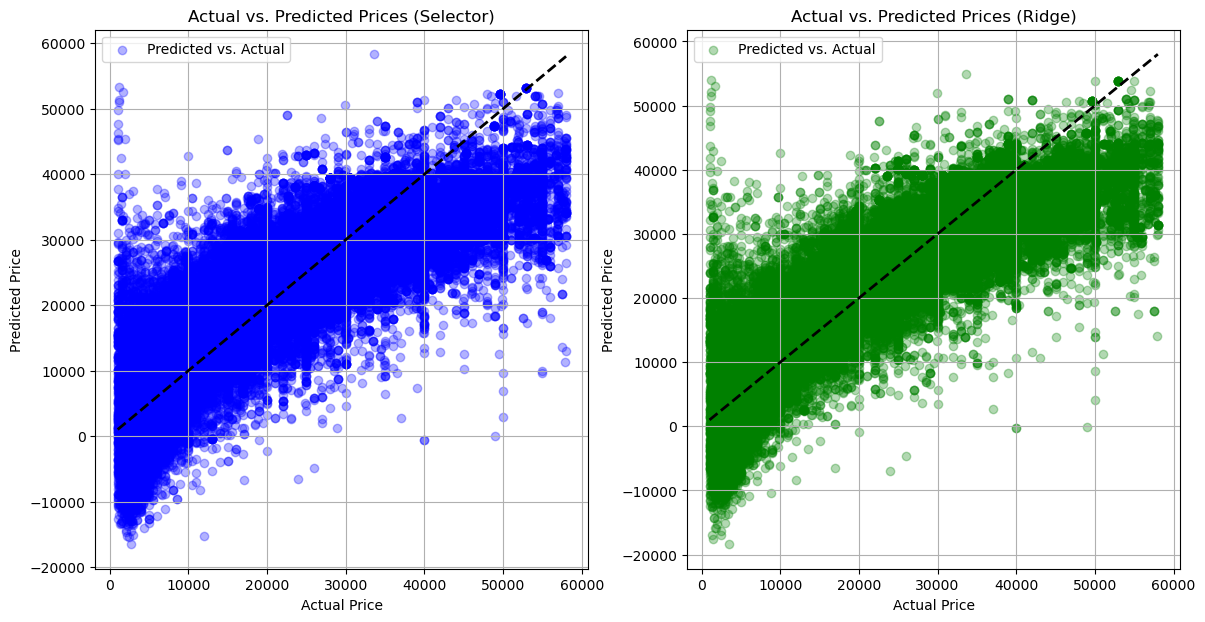

In [211]:
plt.figure(figsize=(14, 7))

# Plot for Sequential Feature Selector Linear Regression
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.scatter(y_test, y_pred_selector, alpha=0.3, color='blue', label='Predicted vs. Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # line y=x
plt.title('Actual vs. Predicted Prices (Selector)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.legend()

# Plot for Ridge Regression
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.scatter(y_test, y_pred_ridge, alpha=0.3, color='green', label='Predicted vs. Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # line y=x
plt.title('Actual vs. Predicted Prices (Ridge)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.legend()

plt.show()


### LASSO Regression

In [217]:
pipeline = Pipeline([
    ('polyfeatures', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('lasso', Lasso(random_state=25))
])
lasso_model = pipeline.fit(X_train, y_train)
lasso_coefs = lasso_model.named_steps['lasso'].coef_

print(f'Lasso model: {lasso_model}')
print(f'Lasso Coefficients: {lasso_coefs}')

lasso_train_mse = mean_squared_error(y_train, lasso_model.predict(X_train))
lasso_test_mse = mean_squared_error(y_test, lasso_model.predict(X_test))
lasso_train_rmsq = np.sqrt(lasso_train_mse)
lasso_test_rmsq = np.sqrt(lasso_test_mse)
lasso_train_m2 = lasso_model.score(X_train, y_train)
lasso_test_m2 = lasso_model.score(X_test, y_test)

print(f'Lasso Train MSE: {lasso_train_mse}')
print(f'Lasso Test MSE: {lasso_test_mse}')
print(f'Lasso Train RMSE: {lasso_train_rmsq}')
print(f'Lasso Test RMSE: {lasso_test_rmsq}')
print(f'Lsso Train R2: {lasso_train_m2}')
print(f'Lasso Test R2: {lasso_test_m2}')

Lasso model: Pipeline(steps=[('polyfeatures', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()),
                ('lasso', Lasso(random_state=25))])
Lasso Coefficients: [ 4436.07782155  3421.5833655  -1069.24963145 ...  1161.36875316
     0.             0.        ]
Lasso Train MSE: 27143769.928474266
Lasso Test MSE: 27136854.176509548
Lasso Train RMSE: 5209.968323173785
Lasso Test RMSE: 5209.3045770534045
Lsso Train R2: 0.8279917790744535
Lasso Test R2: 0.8268989896732993


In [221]:
feature_names = pipeline.named_steps['polyfeatures'].get_feature_names_out()
print(f'feature Names: {feature_names}')

lasso_df = pd.DataFrame({'feature': feature_names, 'coef': lasso_coefs})
lasso_df.loc[lasso_df['coef'] != 0]

feature Names: ['year' 'cylinders' 'odometer' ... 'type_van^2' 'type_van type_wagon'
 'type_wagon^2']


,feature,coef
0,year,4436.077822
1,cylinders,3421.583365
2,odometer,-1069.249631
4,manufacturer_alfa-romeo,-18.434442
7,manufacturer_bmw,-81.755104
...,...,...
2534,type_offroad^2,9.047930
2540,type_pickup^2,1820.918722
2545,type_sedan^2,-667.248209
2549,type_truck^2,2322.998415


#### Linear Regression with polynomial features 

In [223]:
sequential_pipeline = Pipeline([('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
                                ('scaler', StandardScaler()),
                                ('selector', SequentialFeatureSelector(LinearRegression(), n_features_to_select=6)),
                                ('model', LinearRegression())
])

sequential_model = sequential_pipeline.fit(X_train, y_train)

sequential_train_mse = mean_squared_error(y_train, sequential_model.predict(X_train))
sequential_test_mse = mean_squared_error(y_test, sequential_model.predict(X_test))
sequential_train_rmsq = np.sqrt(sequential_train_mse)
sequential_test_rmsq = np.sqrt(sequential_test_mse)
sequential_train_r2 = sequential_model.score(X_train, y_train)
sequential_test_r2 = sequential_model.score(X_test, y_test)

print(f'Sequential Train MSE: {sequential_train_mse}')
print(f'Sequential Test MSE: {sequential_test_mse}')
print(f'Sequential Train RMSE: {sequential_train_rmsq}')
print(f'Sequential Test RMSE: {sequential_test_rmsq}')
print(f'Sequential Train R2: {sequential_train_r2}')
print(f'Sequential Test R2: {sequential_test_r2}')

Sequential Train MSE: 40894185.10923031
Sequential Test MSE: 40796565.897172675
Sequential Train RMSE: 6394.856144529782
Sequential Test RMSE: 6387.218948585736
Sequential Train R2: 0.7408563347915886
Sequential Test R2: 0.7397661966001416


## Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

## Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.